In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

作业整体分为两个部分：
1. 随机生成点后做成矩阵（如果不增加全为1的矩阵，会拟合不到偏移）
2. 分别用闭式解法和梯度下降求得theta，并且生成两幅图展示
（请在jupyter notevbook下运行，否则会无法直接查看图片）

In [2]:
mean = [2,1]
cov = [[1,0.5],[0.5,2]]

data = np.random.multivariate_normal(mean, cov, 30)
x, y= data.T

In [3]:
# 增加一个全为1的列，用来拟合偏移
X = np.array(list(zip(np.ones(x.shape),x)))

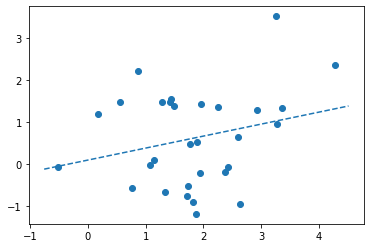

In [4]:
# 闭式解
theta1 = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

plt.scatter(x, y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals1 = x_vals * theta1[1] + theta1[0]
plt.plot(x_vals, y_vals1, '--')

In [5]:
# 梯度下降
# 定义损失函数，实际没有用上
def J(theta, X, y):
    return np.sum((y - X.dot(theta)) ** 2) / (2 * len(X))

# 对损失函数关于theta求导
def dJ(theta, X, y):
    d = np.zeros(2)
    d[0] = np.sum(X.dot(theta) - y) / len(X)
    d[1] = np.sum(X[:, 1].dot(X.dot(theta) - y)) / len(X)
    return d

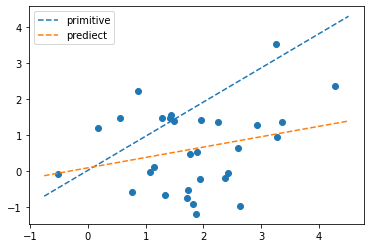

In [6]:
# 初始参数的分布，对应的直线也展示在了图中
theta2 = np.random.rand(2)
y_2 = x_vals * theta2[1] + theta2[0]
plt.plot(x_vals, y_2, '--')

lr = 0.1
count = 0
while count < 5000:
    theta2 = theta2 - lr  * dJ(theta2, X, y)
    if all(abs(dJ(theta2, X, y)) <= 0.001):
        break
    count += 1
    
plt.scatter(x, y)
axes = plt.gca()
y_vals2 = x_vals * theta2[1] + theta2[0]
plt.plot(x_vals, y_vals2, '--')
plt.legend(["primitive", "prediect"])